In [13]:
import glob
import sys
import math

import numpy as np
import pandas as pd
import tensorflow as tf

sys.path.append("../../")

from helpers.experiment import experiment
from helpers.assess import resolve_sample_weight
from helpers.split import make_train_test_split
from helpers.keras_graph_callback import KerasGraphCallback

#%%javascript
#IPython.OutputArea.auto_scroll_threshold = 9999;



Preparing model for Experiment: function_dataset_03_mean_icov

Hidden Layer 1 has 91 nodes.
Hidden Layer 2 has 91 nodes.
Hidden Layer 3 has 91 nodes.
Hidden Layer 4 has 10 nodes.
Hidden Layer 5 has 10 nodes.


Commencing Experiment: function_dataset_03_mean_icov



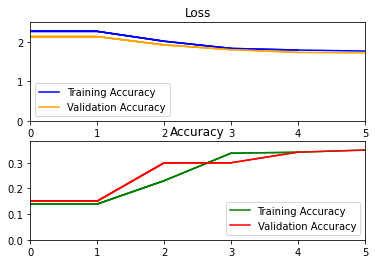

Beginning fit...
Training accuracy: train_accuracy = nan

                   precision  recall  f1-score  support      mcc
                                                                
      genre_blues     0.0199  0.0160    0.0178      374  -0.0019
  genre_classical     0.8296  0.7448    0.7849     4221   0.7211
    genre_country     0.0701  0.5566    0.1246      327   0.1575
      genre_disco     0.0751  0.3391    0.1230      289   0.1297
     genre_hiphop     0.2622  0.1646    0.2022     1701   0.1402
       genre_jazz     0.2427  0.5173    0.3304     1241   0.2804
      genre_metal     0.2379  0.7474    0.3609      665   0.3840
        genre_pop     0.4735  0.0606    0.1074     4274   0.0938
     genre_reggae     0.1742  0.2970    0.2196      788   0.1784
       genre_rock     0.4971  0.2169    0.3020     3200   0.2369
                                                                
         accuracy                       0.3534    17080   0.2905
        macro avg     0.2882  0.

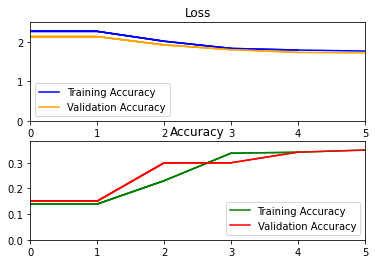

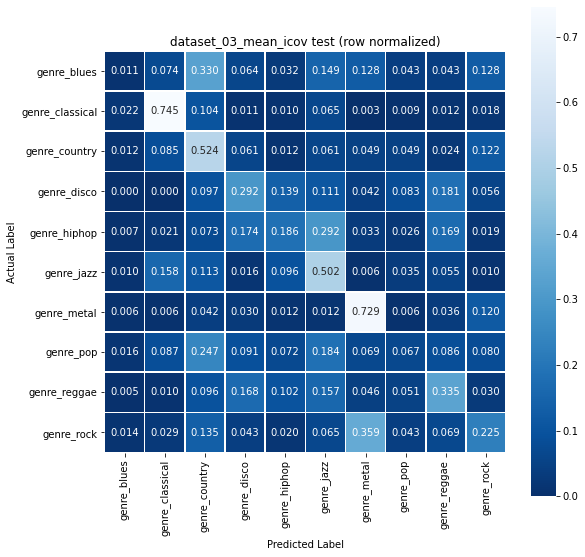

In [157]:
dataset_folder = "../../datasets/"
# datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
datasets = [f'{dataset_folder}dataset_03_mean_icov.pickle']

learning_rate = 0.005
batch_size = 5
epochs = 6
hidden_layers = 5 # should be 0 for baseline model
hidden_size = 10

def nn_model_factory(X_train,y_train,le):
    feature_count=np.shape(X_train)[1]
    classes_count=len(le.classes_)
    model = tf.keras.Sequential()
    for i in range(hidden_layers):
        neuron_count=hidden_size
        if i<3:
            neuron_count=math.floor(feature_count/2)
        #elif i==hidden_layers-1:
        #    neuron_count=classes_count
        # neuron_count=feature_count-math.floor(i*(feature_count-2*classes_count)/hidden_layers)
        print(f'Hidden Layer {i+1} has {neuron_count} nodes.')
        model.add(tf.keras.layers.Dense(
            units=neuron_count,
            activation='relu'
        ))
    model.add(tf.keras.layers.Dense(
        units=classes_count,
        activation='softmax'
    ))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',     
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    return model

def nn_fit_call_fn(model,X_train,y_train,class_weight):
    X_train, X_test, y_train, y_test = make_train_test_split(
        X_train, y_train, test_size=0.3, random_state=10, stratify=y_train
    )
    model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        class_weight=class_weight,
        validation_data=(X_test,y_test),
        verbose=0,
        callbacks=[KerasGraphCallback()],
        validation_freq=1
   )
    
for dataset in datasets:

    experiment(
        nn_model_factory,
        dataset,
        model_fit_call_fn=nn_fit_call_fn,
        postprocess_y_pred_fn=lambda y: np.argmax(y, axis=-1)
    )
    

In [3]:
# isfunction(aa)